In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.ndimage import correlate
import sys
sys.path.append('/Users/bennettd/flecht/flecht/')
from Fungus import Fungus, Filter
import skimage.morphology as morph
import flika as flk
flk.start_flika()
%matplotlib inline

Starting flika
Starting flika inside IPython


In [2]:
# generate all rules for a given neighborhood

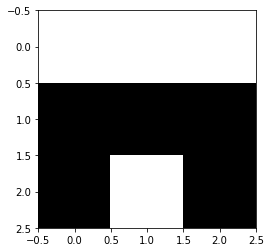

In [505]:
nb = np.zeros([3,3], dtype='int');
nb[0,0] = 1
nb[0,:] = 1
nb[0,-1] = 1
nb[-1,1] = 1
plt.imshow(nb, cmap='gray')

In [506]:
from itertools import combinations
from functools import reduce
from operator import concat
ruleset = range(1, nb.sum() + 1)
rules = reduce(concat, [list(combinations(ruleset, r)) for r in ruleset])
filters = [Filter(nb, r) for r in rules]

In [507]:
def stability_check(t, vol):
    from numpy import array_equal
    stable = False
    if t % 10 == 0:
        stable = array_equal(vol[t], vol[t-1])
    return stable

nstates = 16
#init = np.random.randint(0,nstates, [20,20])
init = np.zeros([20,20])
init[0,0] = 1
results = np.array([Fungus(nstates * [f], trigger_state=0).grow(init, 1024, stability_check=stability_check) for f in filters])

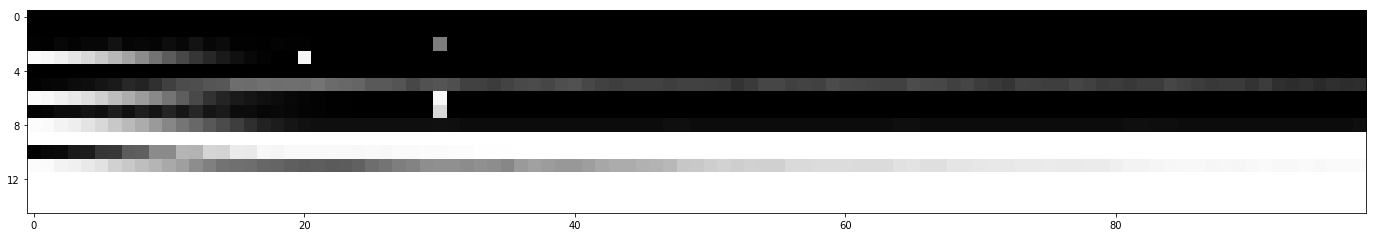

In [508]:
fig, axs = plt.subplots(figsize=(24,24))
axs.imshow(np.abs(np.diff(results[:,:100], axis=1)).clip(0,1).sum((2,3)), cmap='gray', aspect=1)
axs.set_yticks(range(0,results.shape[0],4));

In [ ]:
flk.window.Window(results[:,40])

In [512]:
field = np.zeros([101,101])
field[50,50] = 1
#field = np.random.randint(0,2, [101,101])
sample = Fungus(nstates * [filters[5]], trigger_state=0).grow(field, 512)

In [513]:
flk.window.Window(sample)

AttributeError: 'NoneType' object has no attribute 'currentWindow'

In [492]:
flk.window.Window(results[4])

AttributeError: 'NoneType' object has no attribute 'currentWindow'